# Prediction of Happy Customers

### Background

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

### Data Description

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers X1 = my order was delivered on time X2 = contents of my order was as I expected X3 = I ordered everything I wanted to order X4 = I paid a good price for my order X5 = I am satisfied with my courier X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer

### Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

### Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

### Bonus(es):

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

## Import Libraries and Dataset

In [1]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data import and display
df = pd.read_csv("ACME-HappinessSurvey2020.csv")

df.head(10)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


## Exploratory Data Analysis (EDA)

In [3]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
# check for missing values
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [5]:
# check for duplicated values
df.duplicated().sum()

16

In [6]:
# remove duplicated values
df.drop_duplicates(inplace=True)
df.shape

(110, 7)

In [7]:
# check for imbalance
df["Y"].value_counts()

1    56
0    54
Name: Y, dtype: int64

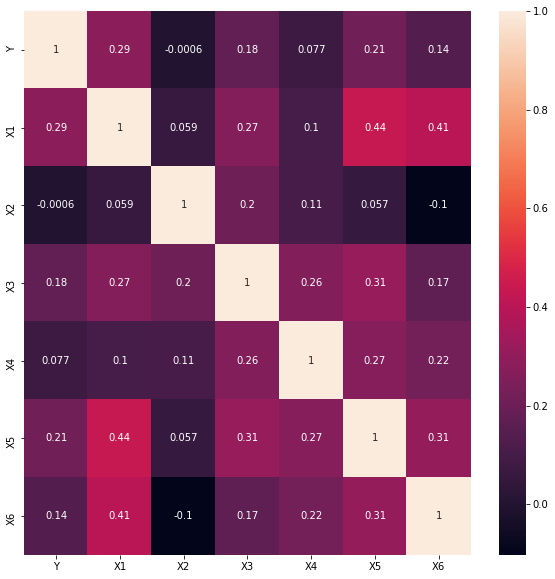

In [8]:
# correlations
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

 X2 and X4 columns can be droped as they are weakly correlated with the target Y

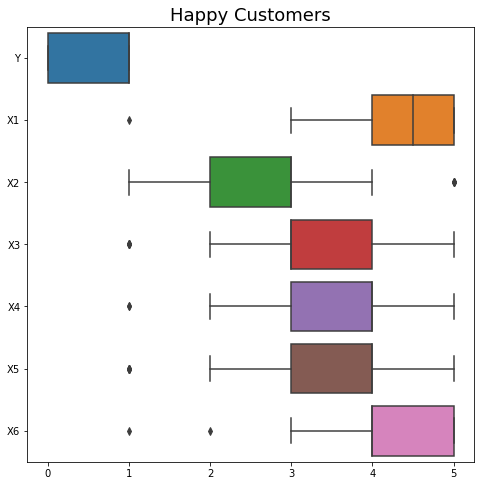

In [9]:
# box plot
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=df, orient="h")
ax.set_title('Happy Customers', fontsize=18)
plt.show()

## Feature Selection and Pre-processing

In [11]:
# labels and targets 
X = df.drop(["Y", "X2", "X4"], axis=1)   # X2 and X4 columns can be droped as they are weakly correlated with the target
y = df["Y"]

In [12]:
# method for outliers
def outlier_detection(cols):
    Q1,Q3 = np.percentile(cols,[25,75])
    IQR = Q3-Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return upper_bound,lower_bound

In [13]:
# handling outliers
num_cols = X.columns
for cols in num_cols:
    upper_bound,lower_bound = outlier_detection(X[cols])
    X[cols] = np.clip(X[cols], a_min=lower_bound,a_max=upper_bound) 

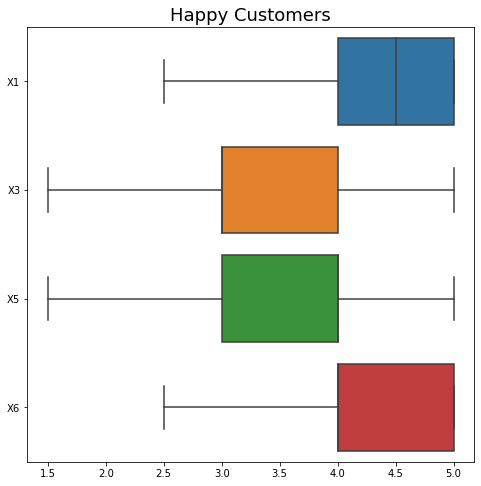

In [14]:
# box plot
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=X, orient="h")
ax.set_title('Happy Customers', fontsize=18)
plt.show()

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cols = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_cols)
X

,X1,X3,X5,X6
0,-1.736919,-0.315274,-1.448291,-0.291606
1,-1.736919,-0.315274,0.336717,-1.574672
2,0.889350,-0.315274,-0.555787,0.991460
3,0.889350,-0.315274,-0.555787,0.991460
4,0.889350,-0.315274,1.229222,0.991460
...,...,...,...,...
105,-0.423784,0.735639,-1.894543,-1.574672
106,0.889350,-0.315274,0.336717,-1.574672
107,0.889350,-0.315274,-1.448291,0.991460
108,-0.423784,-0.315274,0.336717,0.991460


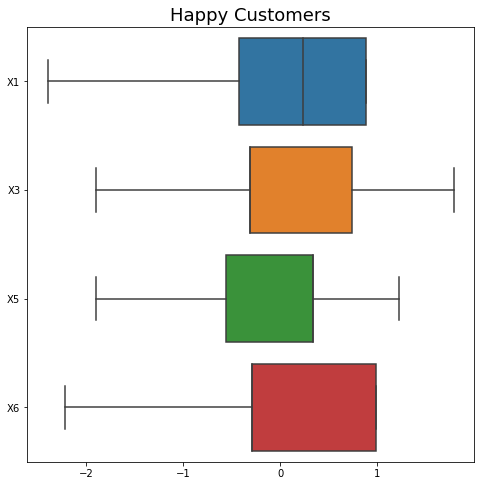

In [16]:
# box plot
plt.figure(figsize=(8,8))
ax = sns.boxplot(data=X, orient="h")
ax.set_title('Happy Customers', fontsize=18)
plt.show()

In [17]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X.shape, X_train.shape, X_test.shape)

(110, 4) (88, 4) (22, 4)


## ML Analysis

In [18]:
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

# ML evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Linear regression
lrc = LogisticRegression(random_state=42, max_iter=10000)
lrc.fit(X_train, y_train)
lrc_pred = lrc.predict(X_test)

# SVC
svc = SVC(kernel="rbf", probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# Decesion Tree
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

# Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

# XGB Classifier
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train, verbose=True)
xgbc_pred = xgbc.predict(X_test)

# Gradiend Boosting
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)


In [19]:
# Logistic regression
print("Accuracy:", accuracy_score(y_test, lrc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(lrc_pred, y_test))

Accuracy: 0.5454545454545454 

Confusion matrix:  
 [[6 5]
 [5 6]]


In [20]:
# SVC
print("Accuracy:", accuracy_score(y_test, svc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(svc_pred, y_test))

Accuracy: 0.5909090909090909 

Confusion matrix:  
 [[5 3]
 [6 8]]


In [21]:
# Decesion Tree
print("Accuracy:", accuracy_score(y_test, dtc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(dtc_pred, y_test))

Accuracy: 0.6818181818181818 

Confusion matrix:  
 [[7 3]
 [4 8]]


In [22]:
# Random Forest
print("Accuracy:", accuracy_score(y_test, rfc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(rfc_pred, y_test))

Accuracy: 0.6363636363636364 

Confusion matrix:  
 [[6 3]
 [5 8]]


In [23]:
# XGB Classifier
print("Accuracy:", accuracy_score(y_test, xgbc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(xgbc_pred, y_test))

Accuracy: 0.6363636363636364 

Confusion matrix:  
 [[6 3]
 [5 8]]


In [24]:
# Gradient Boosting Classifier
print("Accuracy:", accuracy_score(y_test, gbc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(gbc_pred, y_test))

Accuracy: 0.6363636363636364 

Confusion matrix:  
 [[7 4]
 [4 7]]


## Hyperparameter tuning

### GridSearchCV - Random Forest

In [25]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [26]:
# parameters for Random Forest
rfc_params = {'n_estimators':[10,15,30,50,70,90,110], 
            'min_samples_split':[2,4,8,16],
            'min_samples_leaf':[1,2,3,4,5]}

In [27]:
# GridSearch CV for Random Forest
rfc_grid = GridSearchCV(estimator=rfc, 
                        param_grid=rfc_params,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1,
                        return_train_score=False)

In [28]:
# fit the data to do GridSearchCV
rfc_grid_fit = rfc_grid.fit(X, y)

In [29]:
# get the results of the GridSearchCV
rfc_cv = pd.DataFrame(rfc_grid.cv_results_)
rfc_cv.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050000,0.006251,0.009376,0.007655,1,2,10,"{'min_samples_leaf': 1, 'min_samples_split': 2...",0.636364,0.636364,...,0.363636,0.545455,0.545455,0.727273,0.818182,0.272727,0.454545,0.563636,0.156406,128
1,0.067186,0.007161,0.006250,0.007655,1,2,15,"{'min_samples_leaf': 1, 'min_samples_split': 2...",0.636364,0.636364,...,0.363636,0.636364,0.545455,0.727273,0.727273,0.272727,0.454545,0.563636,0.145455,128


In [30]:
# results from GridSearchCV
rfc_cv[['param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,mean_test_score
0,10,2,1,0.563636
1,15,2,1,0.563636
2,30,2,1,0.536364
3,50,2,1,0.563636
4,70,2,1,0.590909
...,...,...,...,...
135,30,16,5,0.590909
136,50,16,5,0.618182
137,70,16,5,0.581818
138,90,16,5,0.590909


In [31]:
# best parameters
rfc_grid_fit.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 10}

In [32]:
# best score
rfc_grid_fit.best_score_

0.6545454545454544

In [100]:
# Random Forest Classifier with Tuned/Optimized parameters
# rfc_tuned = RandomForestClassifier(n_estimators=10,
                                   min_samples_split=2, 
                                   min_samples_leaf=5, 
                                   random_state=42)
# rfc_tuned.fit(X_train, y_train)
# y_pred_tuned = rfc_tuned.predict(X_test)
# accuracy_score(y_test, y_pred_tuned)

0.6363636363636364

.

### GridSearchCV - Support Vector Classifier (SVC)

In [47]:
# parameters for SVC
svc_params = {'C':[0.01, 0.1, 0.5, 1, 2, 5, 10], 
              'kernel':['rbf', 'linear'], 
              'gamma':[0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 1, 5]}

In [48]:
# GridSearchCV for SVC
svc_grid = GridSearchCV(estimator=svc, 
                        param_grid=svc_params, 
                        scoring="accuracy", 
                        cv=10, 
                        n_jobs=-1, 
                        return_train_score=False)

In [49]:
# fit the data to do GridSearchCV
svc_grid_fit = svc_grid.fit(X, y)

In [50]:
# get the results of the GridSearchCV
svc_cv = pd.DataFrame(svc_grid.cv_results_)
svc_cv.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009166,0.002399,0.003366,0.003957,0.01,0.0001,rbf,"{'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}",0.454545,0.454545,...,0.454545,0.545455,0.545455,0.545455,0.545455,0.545455,0.545455,0.509091,0.044536,86
1,0.003168,0.005215,0.005492,0.007045,0.01,0.0001,linear,"{'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}",0.727273,0.545455,...,0.363636,0.727273,0.727273,0.636364,0.818182,0.545455,0.454545,0.590909,0.153472,49


In [51]:
# results from GridSearchCV
svc_cv[['param_C', 'param_kernel', 'param_gamma', 'mean_test_score']]

,param_C,param_kernel,param_gamma,mean_test_score
0,0.01,rbf,0.0001,0.509091
1,0.01,linear,0.0001,0.590909
2,0.01,rbf,0.001,0.509091
3,0.01,linear,0.001,0.590909
4,0.01,rbf,0.01,0.509091
...,...,...,...,...
107,10,linear,0.5,0.609091
108,10,rbf,1,0.590909
109,10,linear,1,0.609091
110,10,rbf,5,0.490909


In [52]:
# best parameters
svc_grid_fit.best_params_

{'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [53]:
# best score
svc_grid_fit.best_score_

0.6272727272727272

In [61]:
# SVC with Tuned/Optimized parameters
# svc_tuned = SVC(C=5, 
          kernel="rbf", 
          gamma=0.1,
          probability=True)

# svc_tuned.fit(X_train, y_train)
# svc_tuned_pred = svc_tuned.predict(X_test)
# accuracy_score(y_test, svc_tuned_pred)

0.5454545454545454

.

### GridSearchCV - Decision Tree 

In [54]:
# parameters for Decision Tree
dtc_params = {'min_samples_split':[2,3,4,5,8,16,20],
              'min_samples_leaf':[1,2,3,4,5,10],
              'criterion':['gini', 'entropy'],
              'max_depth':[None,2,4,6,8,10,12]}

In [55]:
# GridSearchCV for Decision Tree
dtc_grid = GridSearchCV(estimator=dtc, 
                        param_grid=dtc_params, 
                        scoring="accuracy", 
                        cv=10, 
                        n_jobs=-1, 
                        return_train_score=False)

In [56]:
# fit the data to do GridSearchCV
dtc_grid_fit = dtc_grid.fit(X, y)

In [57]:
# get the results of the GridSearchCV
dtc_cv = pd.DataFrame(dtc_grid.cv_results_)
dtc_cv.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008001,0.00106,0.001357,0.002764,gini,None,1,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.727273,...,0.363636,0.545455,0.363636,0.545455,0.636364,0.272727,0.363636,0.509091,0.153203,587
1,0.007077,0.00726,0.003133,0.006266,gini,None,1,3,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.727273,...,0.363636,0.545455,0.545455,0.545455,0.636364,0.272727,0.363636,0.536364,0.149102,567


In [58]:
# results from GridSearchCV
dtc_cv[['param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]

,param_criterion,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score
0,gini,None,2,1,0.509091
1,gini,None,3,1,0.536364
2,gini,None,4,1,0.545455
3,gini,None,5,1,0.563636
4,gini,None,8,1,0.600000
...,...,...,...,...,...
583,entropy,12,4,10,0.609091
584,entropy,12,5,10,0.609091
585,entropy,12,8,10,0.609091
586,entropy,12,16,10,0.609091


In [60]:
# best parameters
dtc_grid_fit.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [61]:
dtc_grid_fit.best_score_

0.6454545454545455

It also was found that based on correlation coefficients X2 and X4 are not important features when predicting a customer’s happiness. Therefore, they were removed from the analysis